In [ ]:
from sympy import *
from sympy.stats import *
from sympy.functions import *
from sympy.integrals import *
from sympy.stats import Normal, density, E, std, cdf, skewness, quantile, marginal_distribution
from sympy import Symbol, simplify, pprint

In [ ]:
# Symbols
theta = Symbol('theta', positive=True)
mu = Symbol("mu")
sigma = Symbol("sigma", positive=True)
i = Symbol('i', positive=True, Set=S.Naturals)
t = Symbol('')
x = Indexed('x', i) # need indexed variable for summation and product
n = Symbol('n', positive=True, Set=S.Naturals)
z = Symbol("z")
y = Symbol("y")
p = Symbol("p")
a, b, c, d, e, k, t = symbols('a b c d e k t')
X = Normal("x", mu, sigma)
t1 = Symbol('theta1')
t2 = Symbol('theta2')
tau = Symbol('tau')
lm = Symbol('lambda')
al = Symbol('alpha')
be = Symbol('beta')

# Question 1

Let $\mathbf{X} = (X_1, X_2,...,X_n)$ be iid Bernoulli $(\theta)$ random variables with density

$$f(x,\theta) = \theta^x(1-\theta)^{1-x}$$

where $x = \{\ 0,1 \}\ $ and $\theta \in (0,1)$


In [ ]:
# option d, defined in notes week 2 slide 47

![1a-2.png](attachment:1a-2.png)


![1a-1.png](attachment:1a-1.png)

# 1b)
the statistic $W = X_1X_2$ is a simple and unbiased estimate of $\theta^2$. Hence derive the UMVUE of $h(\theta) = \theta^2$

In [ ]:
# ref slide 33, 80, 102

![q1b-1.png](attachment:q1b-1.png)

![1b-2.png](attachment:1b-2.png)

In [ ]:
# 1c)
Caluclate the Cramer-Rao lower bound for the minimal variance of an unbiased estimator of $h(\theta) = \theta^2$

In [ ]:
likelihood = theta ** x * (1 - theta) ** (1 - x)
likelihood

In [ ]:
# log likelihood
log_likelihood = expand_log(log(likelihood), force=True)
log_likelihood

In [ ]:
# first derivative of log likelihood with regard to theta
diff1 = diff(log_likelihood, theta)
diff1

In [ ]:
# second derivative of logl wrt theta
diff2 = diff(diff1, theta)
diff2

In [ ]:
# Fisher information I(theta) 1 RV
# for n iids, just multiply by n
# sub theta into x and simplify

fisher = simplify(diff2.subs(x, theta))
fisher

In [ ]:
# CRLB

# function of theta
tau = theta**2

crlb = diff(tau, theta)**2 / (n*fisher)
crlb

![q1c.png](attachment:q1c.png)

# 1d
which of the following representations of the score $V(\mathbf{X, \theta})$ show the variance of the UMVUE of $h(\theta)$ does not attain the CRLB?

In [ ]:
# not really sure how to do this one

![1d-1.png](attachment:1d-1.png)

![1d-2.png](attachment:1d-2.png)

# 1e
find the MLE $\hat{h}$ of $h(\theta)= \theta^2$

In [ ]:
# first derivative of log likelihood with regard to theta
score = diff(log_likelihood, theta)
score

In [ ]:
# derivative of logl
diff1 = simplify(diff(log_likelihood, theta))
diff1

In [ ]:
# set derivative to zero, then solve for theta to identify MLE
mle = solve(diff1, theta)
# pprint(mle)
mle

![1e.png](attachment:1e.png)

# Question 2
Suppose that $X_1,...,X_n$ are iid and have a density
$$f(x, \theta) = \theta^{-x\theta}, x > 0$$\n"

$\theta > 0$ is an unknown parameter and a prior density is given by

$\tau(\theta) = ke^{-k\theta}, \theta >0$ where $k$ is a known constant

**Hint** the density of a Gamma($\alpha. \beta$) is given by:

$$f(x, \alpha, \beta) = \dfrac{1}{\Gamma (\alpha) \beta^{\alpha - 1} e^{-x/\beta}}, 0 \leq x < \infty. \alpha, \beta > 0$$

with mean $\alpha, \beta$

## 2a:
calculate the posterior density of $\Theta$ given $X_1 = x_1, X_2=x_2,..., X_n = x_n$

In [ ]:
# ref week 3 slide 25. identical answer

![q2a.png](attachment:q2a.png)

In [ ]:
# 2b:
Find the Bayesian estimator for $\theta$ with respect to the squared error loss

In [ ]:
# answer identical to slide 27

![q2b.png](attachment:q2b.png)

# 2c:
unclear on how to calculate this

5

# 2d:
suppose you want to test whether the parameter $\theta$ is smaller that $\theta_0$. Which of the following corresponds to the rejection region for the null hypothesis $H_0: \theta \leq \theta_0$ when using a 0-1 loss

In [ ]:
# ref week 4 slide 85 

![q2d.png](attachment:q2d.png)

# 3a:
consider $n$ iid observations from a Uniform($\theta$) distribution with density function:

$$f(x; \theta) = \dfrac{1}{\theta}I_{(x, \infty)}(\theta)$$,

and $\theta > 0$

In [ ]:
# very similar to slide 46

![3a.png](attachment:3a.png)

# 3b:
argue why $T = X_{(n)}$ is sufficient for $\theta$

In [ ]:
# ref slide 46, option a is the only with a pdf that makes sense.

![Screenshot%20from%202022-06-28%2011-58-02.png](attachment:Screenshot%20from%202022-06-28%2011-58-02.png)

# 3c:
It is known that the density of $T = X_{(n)}$ is given by 

$$f_T(t,\theta) = \dfrac{nt^{n-1}}{\theta^n}, 0 < t < \theta$$

find the expectation of $X_{(n)}$

In [ ]:
# definite integral of t
f = t * ((n*t**(n-1))/(theta**n))
wrt = t
lower = 0
upper = theta

integrate(f, (wrt, lower, upper), conds='none').doit()

![3c.png](attachment:3c.png)

# 3d:
suppose we use the estimator $\bar{X}$ as an estimator for $\theta$. Calcuate its bias.

In [ ]:
# we know from 3c that E(T) = theta/2 for X_1

# we also know that bias = E(theta) - theta

# therefore the bias is -theta/2

![3d.png](attachment:3d.png)

# 3e
suppose that the parameter of interest is $\tau (\theta) = \dfrac{1}{\theta}$. Find the MLE of $\tau (\theta)$

In [ ]:
# we know from 3a that the MLE for theta is Xn, 
# therefore the MLE for tau theta is 1/Xn

![3e.png](attachment:3e.png)

# 3f:
It can be shown that 

$$E \bigg( \dfrac{1}{X_{(n)}} \bigg) = \dfrac{n}{\theta(n-1)}$$

and that $T = X_{(n)}$ is also complete for $\theta$. Hence or otherwise, find the UMVUE of $\tau(\theta) = \dfrac{1}{\theta}$

In [ ]:
# in 3c we calculated that the expected value of xbar was (n-1)/(n)*theta

# in 3d we calculated that the bias for Xbar was 1/theta

# if we combine these, we get the UMVUE

![3f.png](attachment:3f.png)

# Q4
Let $X_1, X_2,...,X_n$ be a sample from the density function 

$$f(x;\theta) = \theta x^{\theta - 1}$$

where $0 < x < 1$ and $\theta > 0$

# 4a
which of the following is a complete and sufficient statistic for $\theta$

In [ ]:
# likelihood

# UNCOMMENT here to use an inbuilt distribution
#X = Normal('x', 0, theta)
#lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)

likelihood

In [ ]:
# log likelihood

log_likelihood = expand_log(log(likelihood), force=True)
log_likelihood

In [ ]:
# first derivative of logl wrt theta

diff1 = diff(log_likelihood, theta)
diff1

In [ ]:
diff1 - (1/theta)

![4a-1.png](attachment:4a-1.png)

![4a-2.png](attachment:4a-2.png)

# 4b
what is the MLE of $\theta$?

In [ ]:
# likelihood for 1 RV
# UNCOMMENT here to use an inbuilt distribution
# X = Normal('x',0, 1/theta)
# likelihood = simplify(density(X)(x))
# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)
likelihood

In [ ]:
# likelihood for n RVs
likelihood = Product(likelihood, (i, 1, n)).doit()
likelihood

In [ ]:
# log likelihood

# either do expand() or expand_log() here
log_likelihood = expand(log(likelihood), force=True)
log_likelihood

In [ ]:
# derivative of logl
diff1 = simplify(diff(log_likelihood, theta))
diff1

In [ ]:
# set derivative to zero, then solve for theta to identify MLE
mle = solve(diff1, theta)
pprint(mle)
# mle

![4b-1.png](attachment:4b-1.png)

![4b-2.png](attachment:4b-2.png)

# 4c
state the asymptotic distribution of the MLE of $\theta$

![4c-2.png](attachment:4c-2.png)

![4c-1.png](attachment:4c-1.png)

# 4d:
Suppose we are now interested in the parameter $\tau(\theta) = \dfrac{\theta}{1+\theta}$. Apply the delta method to obtain the asymptotic distribution of $\tau\theta$

In [ ]:
# this is identical to week 3 slide 79

![q4d-1.png](attachment:q4d-1.png)

![q4d.png](attachment:q4d.png)

# 4e:
Find the function $h$ of $\theta$ for which there exists an unbiased estimator whose variance coincides with the Cramer-Rao lower bound. **Hint:** look at the score function $V(X,\theta)$

In [ ]:
# likelihood
# UNCOMMENT here to use an inbuilt distribution
# X = Normal('x', 0, theta)
# lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)
likelihood

In [ ]:
# log likelihood

log_likelihood = expand_log(log(likelihood), force=True)
log_likelihood

In [ ]:
# score for 1 RV
# first derivative of logl wrt theta

score = diff(log_likelihood, theta)
score

![4e-1.png](attachment:4e-1.png)

![4e-2.png](attachment:4e-2.png)

# 5:
let $\mathbf{X} = (X_1, X_2,..., X_n)$ be iid observations from $N(0,\theta)$ population

# 5a:
argue why $ T = \sum_{i=1}^{n}X_i^2$ has the MLR property

![q5a-1.png](attachment:q5a-1.png)

![q5a-2.png](attachment:q5a-2.png)

ref week 2 slide 45 - 49

# 5b
consider testing $H_0: \theta \leq \theta_0 \text{ vs } H_1: \theta > \theta_0$. The UMP $\alpha$ test exists due to the teorem of Blackwell and Girshick. Which of the following is the correct structure for the UMP $\alpha$ test?

![5b.png](attachment:5b.png)

ref week 4 slides 51 - 66

# 5c
find the threshold constant that defines the test in b)

ref week 4 slide 62. identical except uses k instead of C 

![5c-1.png](attachment:5c-1.png)

![5c-2.png](attachment:5c-2.png)

# 5d
for the following test

$$\varphi^*(\mathbf{X}) = 
\begin{cases}
1 & \text{ if } & T \geq k \\
0 & \text{ if } & T < k
\end{cases}
$$

calculate the power function

![5d-1.png](attachment:5d-1.png)

![5d-2.png](attachment:5d-2.png)

# 5e:
select the most appropriate statement about the power function in d)

![5e.png](attachment:5e.png)

In [7]:
# first derivative of log likelihood with regard to theta
diff1 = diff(log_likelihood, theta)
diff1

-(1 - x[i])/(1 - theta) + x[i]/theta

In [8]:
# second derivative of logl wrt theta
diff2 = diff(diff1, theta)
diff2

-(1 - x[i])/(1 - theta)**2 - x[i]/theta**2

In [9]:
# Fisher information I(theta) 1 RV
# for n iids, just multiply by n
# sub theta into x and simplify

fisher = simplify(diff2.subs(x, theta))
fisher

1/(theta*(theta - 1))

In [10]:
# CRLB

# function of theta
tau = theta**2

crlb = diff(tau, theta)**2 / (n*fisher)
crlb

4*theta**3*(theta - 1)/n

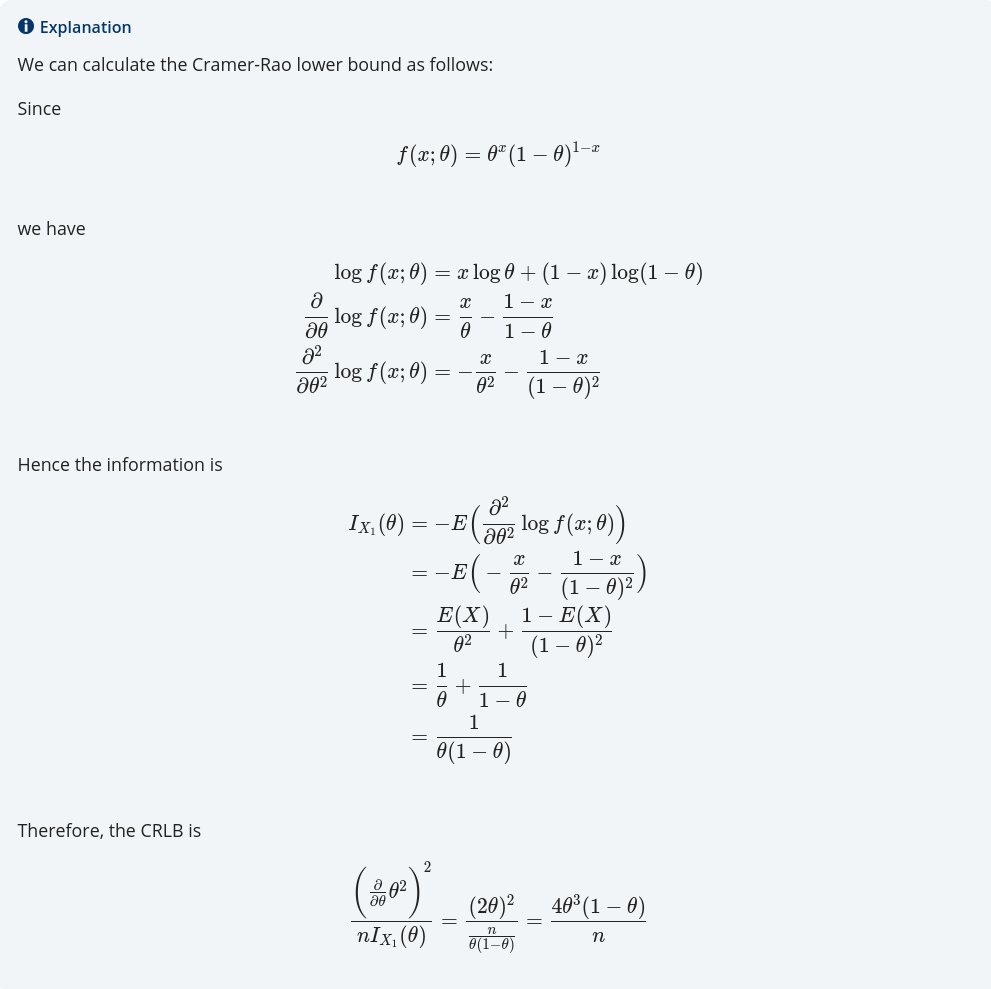

# 1d
which of the following representations of the score $V(\mathbf{X, \theta})$ show the variance of the UMVUE of $h(\theta)$ does not attain the CRLB?

In [11]:
# not really sure how to do this one

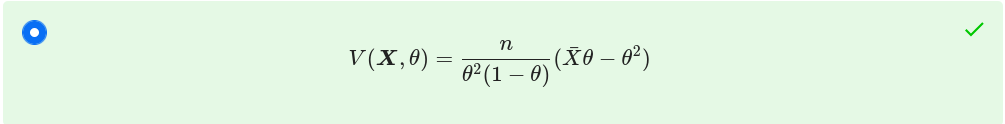

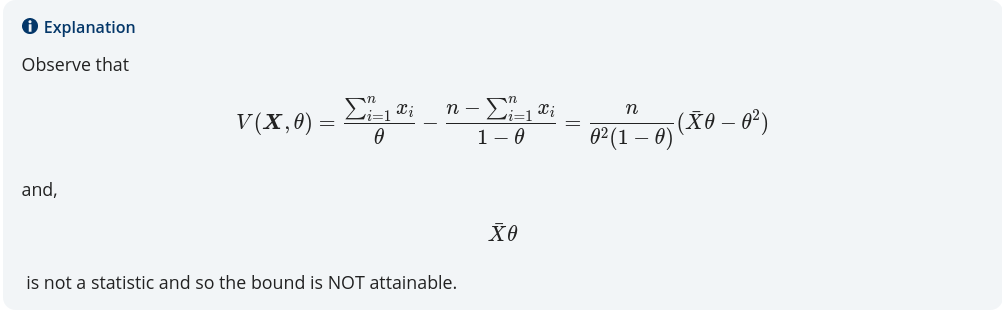

# 1e
find the MLE $\hat{h}$ of $h(\theta)= \theta^2$

In [12]:
# first derivative of log likelihood with regard to theta
score = diff(log_likelihood, theta)
score

-(1 - x[i])/(1 - theta) + x[i]/theta

In [13]:
# derivative of logl
diff1 = simplify(diff(log_likelihood, theta))
diff1

(theta - x[i])/(theta*(theta - 1))

In [14]:
# set derivative to zero, then solve for theta to identify MLE
mle = solve(diff1, theta)
# pprint(mle)
mle

[x[i]]

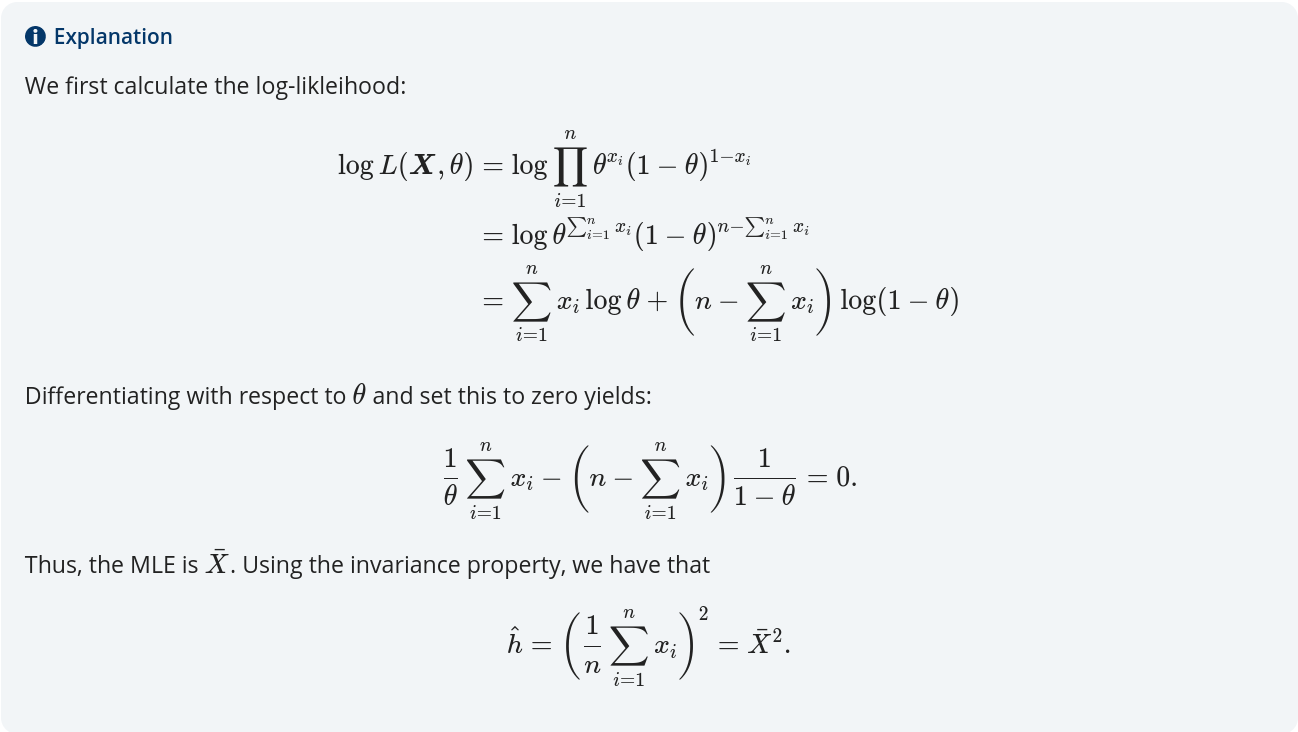

# Question 2
Suppose that $X_1,...,X_n$ are iid and have a density
$$f(x, \theta) = \theta^{-x\theta}, x > 0$$\n"

$\theta > 0$ is an unknown parameter and a prior density is given by

$\tau(\theta) = ke^{-k\theta}, \theta >0$ where $k$ is a known constant

**Hint** the density of a Gamma($\alpha. \beta$) is given by:

$$f(x, \alpha, \beta) = \dfrac{1}{\Gamma (\alpha) \beta^{\alpha - 1} e^{-x/\beta}}, 0 \leq x < \infty. \alpha, \beta > 0$$

with mean $\alpha, \beta$

## 2a:
calculate the posterior density of $\Theta$ given $X_1 = x_1, X_2=x_2,..., X_n = x_n$

In [15]:
# ref week 3 slide 25. identical answer

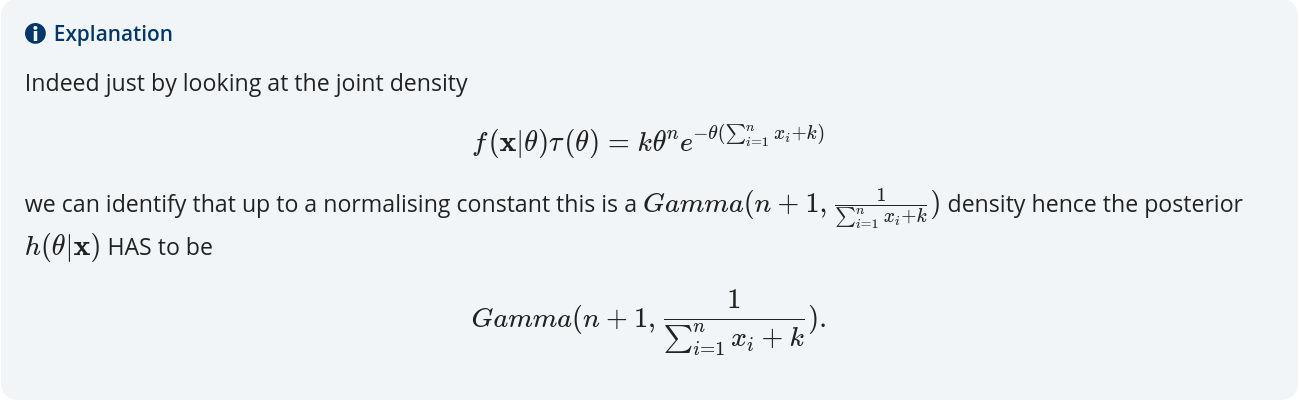

In [ ]:
# 2b:
Find the Bayesian estimator for $\theta$ with respect to the squared error loss

In [17]:
# answer identical to slide 27

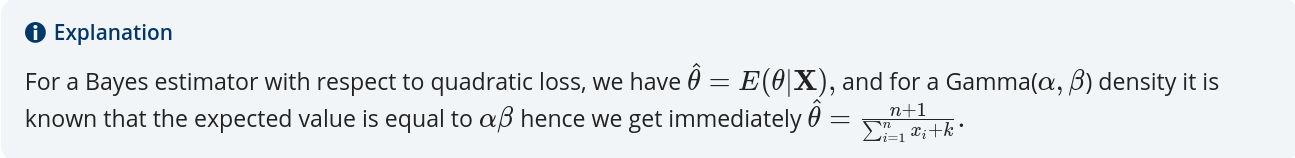

# 2c:
unclear on how to calculate this

5

# 2d:
suppose you want to test whether the parameter $\theta$ is smaller that $\theta_0$. Which of the following corresponds to the rejection region for the null hypothesis $H_0: \theta \leq \theta_0$ when using a 0-1 loss

In [18]:
# ref week 4 slide 85 

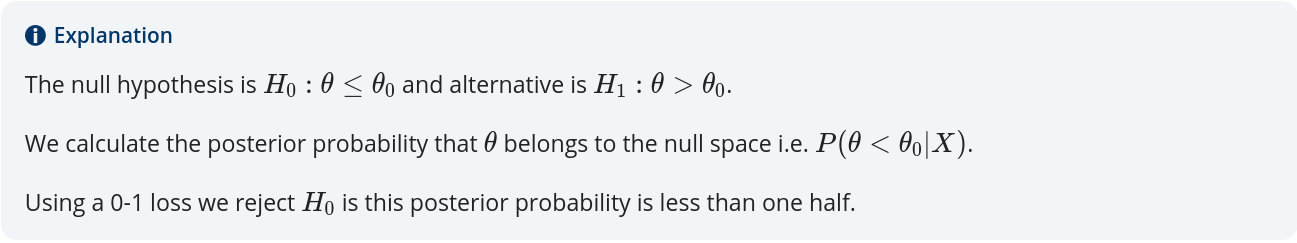

# 3a:
consider $n$ iid observations from a Uniform($\theta$) distribution with density function:

$$f(x; \theta) = \dfrac{1}{\theta}I_{(x, \infty)}(\theta)$$,

and $\theta > 0$

In [19]:
# very similar to slide 46

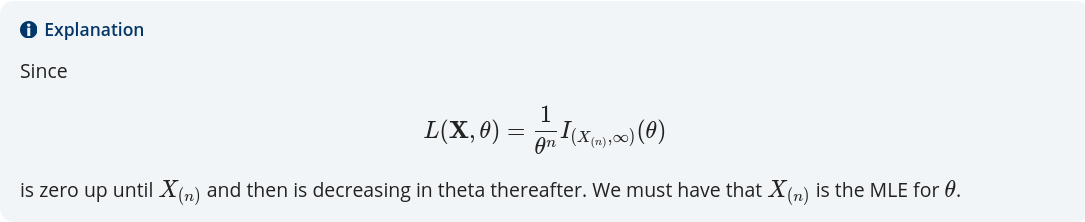

# 3b:
argue why $T = X_{(n)}$ is sufficient for $\theta$

In [20]:
# ref slide 46, option a is the only with a pdf that makes sense.

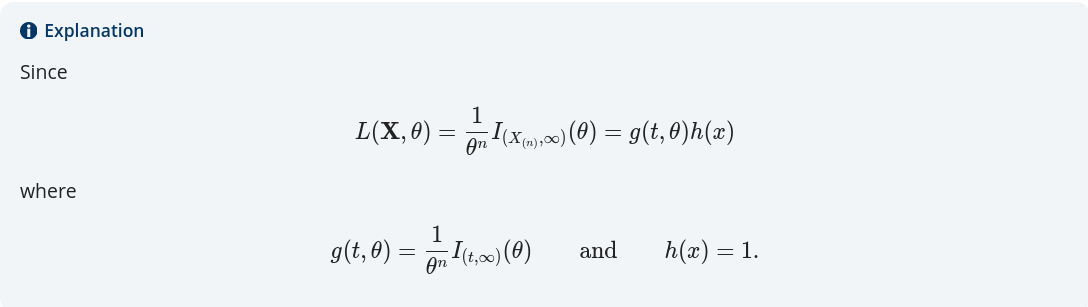

# 3c:
It is known that the density of $T = X_{(n)}$ is given by 

$$f_T(t,\theta) = \dfrac{nt^{n-1}}{\theta^n}, 0 < t < \theta$$

find the expectation of $X_{(n)}$

In [21]:
# definite integral of t
f = t * ((n*t**(n-1))/(theta**n))
wrt = t
lower = 0
upper = theta

integrate(f, (wrt, lower, upper), conds='none').doit()

n*theta/(n + 1)

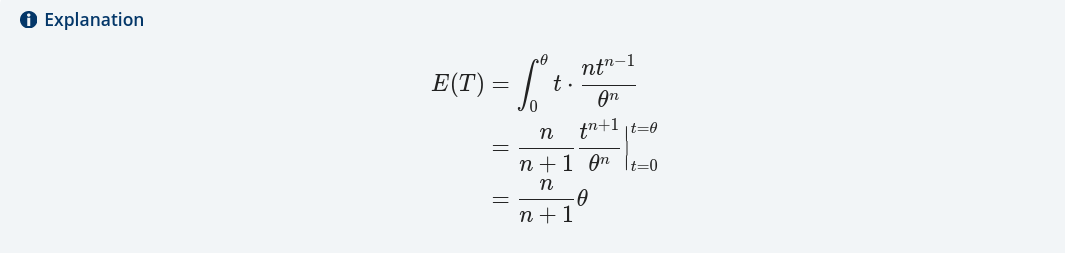

# 3d:
suppose we use the estimator $\bar{X}$ as an estimator for $\theta$. Calcuate its bias.

In [22]:
# we know from 3c that E(T) = theta/2 for X_1

# we also know that bias = E(theta) - theta

# therefore the bias is -theta/2

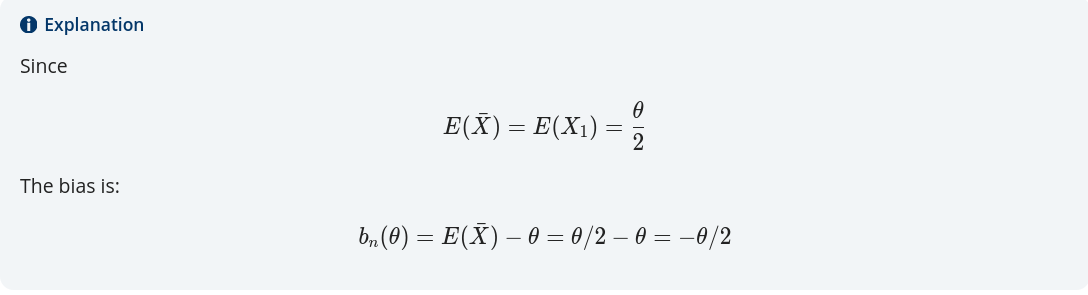

# 3e
suppose that the parameter of interest is $\tau (\theta) = \dfrac{1}{\theta}$. Find the MLE of $\tau (\theta)$

In [23]:
# we know from 3a that the MLE for theta is Xn, 
# therefore the MLE for tau theta is 1/Xn

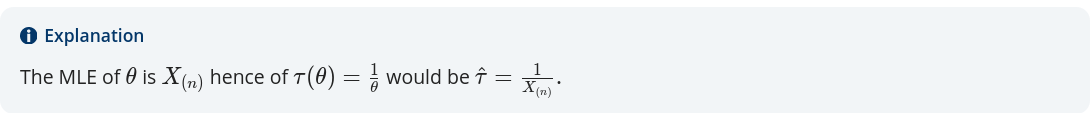

# 3f:
It can be shown that 

$$E \bigg( \dfrac{1}{X_{(n)}} \bigg) = \dfrac{n}{\theta(n-1)}$$

and that $T = X_{(n)}$ is also complete for $\theta$. Hence or otherwise, find the UMVUE of $\tau(\theta) = \dfrac{1}{\theta}$

In [24]:
# in 3c we calculated that the expected value of xbar was (n-1)/(n)*theta

# in 3d we calculated that the bias for Xbar was 1/theta

# if we combine these, we get the UMVUE

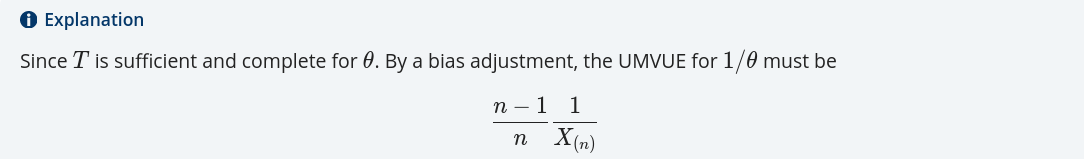

# Q4
Let $X_1, X_2,...,X_n$ be a sample from the density function 

$$f(x;\theta) = \theta x^{\theta - 1}$$

where $0 < x < 1$ and $\theta > 0$

# 4a
which of the following is a complete and sufficient statistic for $\theta$

In [25]:
# likelihood

# UNCOMMENT here to use an inbuilt distribution
#X = Normal('x', 0, theta)
#lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)

likelihood

theta*x[i]**(theta - 1)

In [26]:
# log likelihood

log_likelihood = expand_log(log(likelihood), force=True)
log_likelihood

(theta - 1)*log(x[i]) + log(theta)

In [27]:
# first derivative of logl wrt theta

diff1 = diff(log_likelihood, theta)
diff1

log(x[i]) + 1/theta

In [28]:
diff1 - (1/theta)

log(x[i])

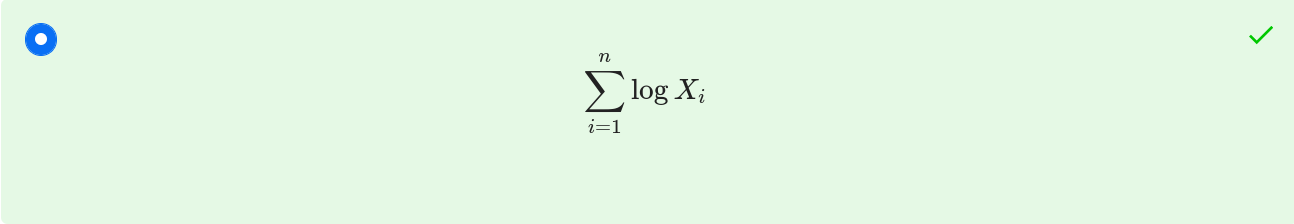

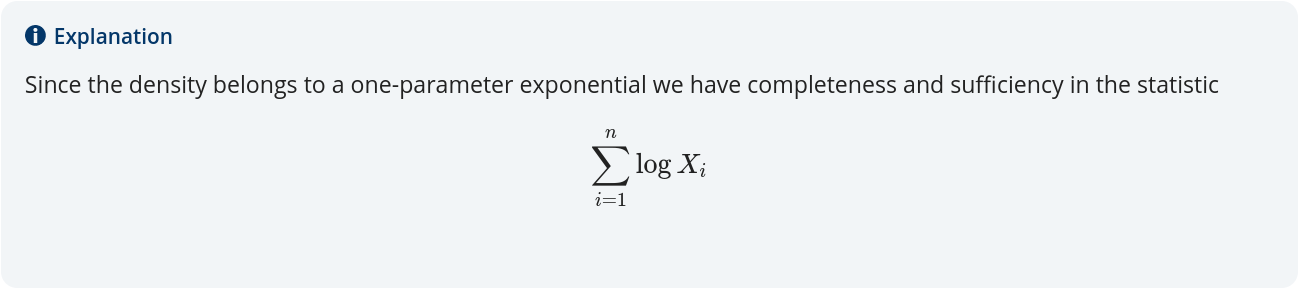

# 4b
what is the MLE of $\theta$?

In [29]:
# likelihood for 1 RV
# UNCOMMENT here to use an inbuilt distribution
# X = Normal('x',0, 1/theta)
# likelihood = simplify(density(X)(x))
# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)
likelihood

theta*x[i]**(theta - 1)

In [30]:
# likelihood for n RVs
likelihood = Product(likelihood, (i, 1, n)).doit()
likelihood

theta**n*Product(x[i]**(theta - 1), (i, 1, n))

In [31]:
# log likelihood

# either do expand() or expand_log() here
log_likelihood = expand(log(likelihood), force=True)
log_likelihood

n*log(theta) + Sum(theta*log(x[i]) - log(x[i]), (i, 1, n))

In [32]:
# derivative of logl
diff1 = simplify(diff(log_likelihood, theta))
diff1

n/theta + Sum(log(x[i]), (i, 1, n))

In [33]:
# set derivative to zero, then solve for theta to identify MLE
mle = solve(diff1, theta)
pprint(mle)
# mle

⎡      -n       ⎤
⎢───────────────⎥
⎢  n            ⎥
⎢ ___           ⎥
⎢ ╲             ⎥
⎢  ╲            ⎥
⎢  ╱   log(x[i])⎥
⎢ ╱             ⎥
⎢ ‾‾‾           ⎥
⎣i = 1          ⎦


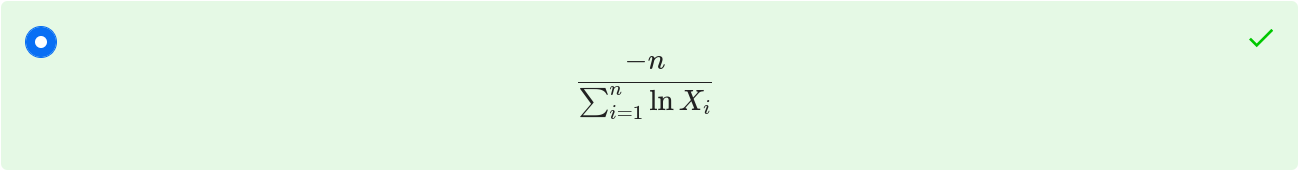

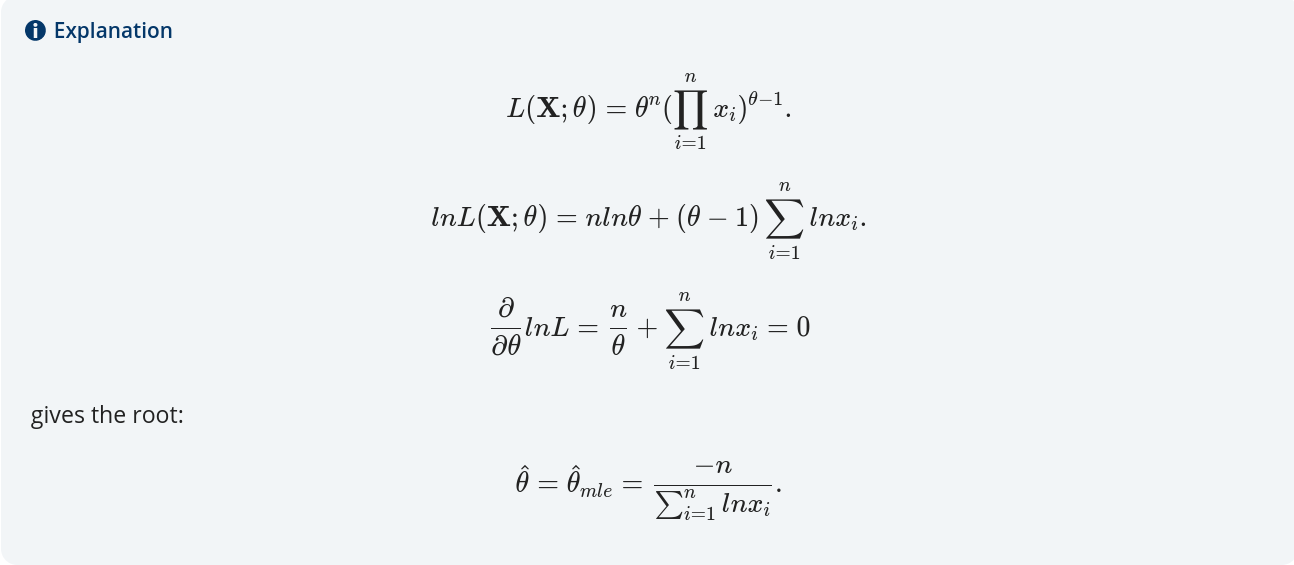

# 4c
state the asymptotic distribution of the MLE of $\theta$

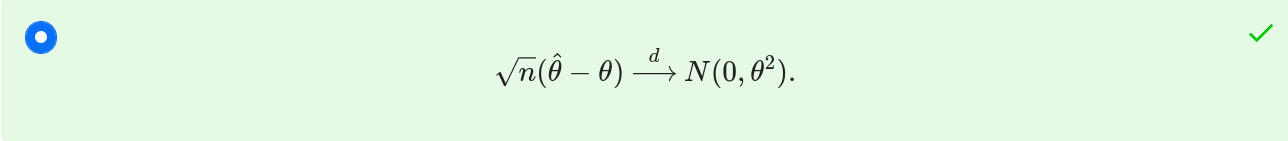

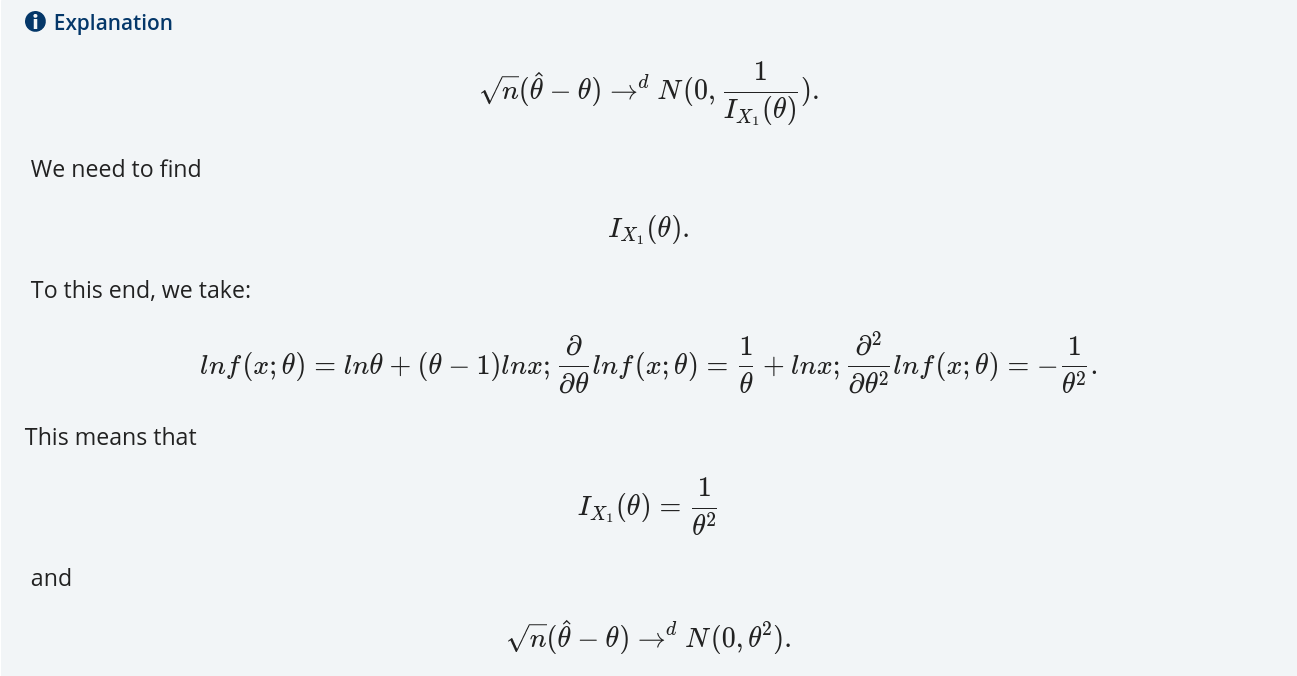

# 4d:
Suppose we are now interested in the parameter $\tau(\theta) = \dfrac{\theta}{1+\theta}$. Apply the delta method to obtain the asymptotic distribution of $\tau\theta$

In [34]:
# this is identical to week 3 slide 79

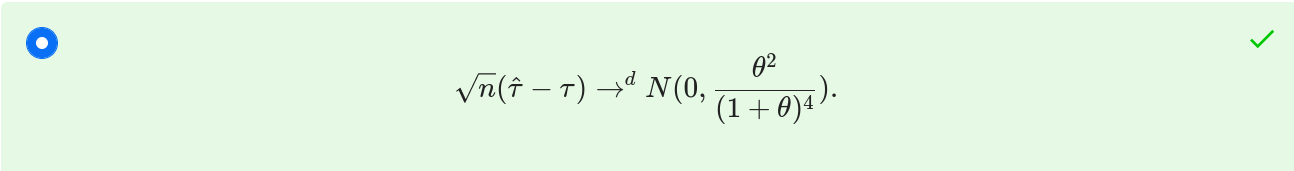

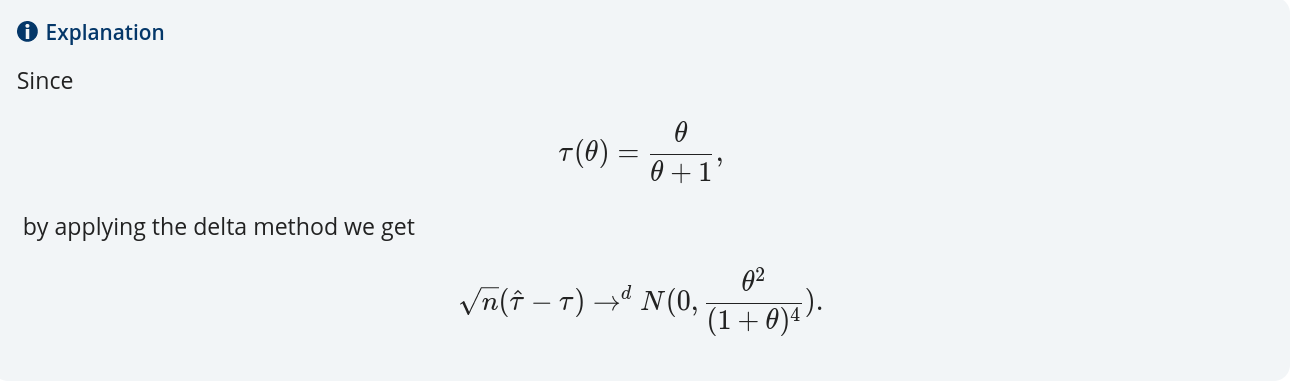

# 4e:
Find the function $h$ of $\theta$ for which there exists an unbiased estimator whose variance coincides with the Cramer-Rao lower bound. **Hint:** look at the score function $V(X,\theta)$

In [35]:
# likelihood
# UNCOMMENT here to use an inbuilt distribution
# X = Normal('x', 0, theta)
# lhood = simplify(density(X)(x))

# UNCOMMENT here to define manually
likelihood = theta * x ** (theta - 1)
likelihood

theta*x[i]**(theta - 1)

In [36]:
# log likelihood

log_likelihood = expand_log(log(likelihood), force=True)
log_likelihood

(theta - 1)*log(x[i]) + log(theta)

In [37]:
# score for 1 RV
# first derivative of logl wrt theta

score = diff(log_likelihood, theta)
score

log(x[i]) + 1/theta

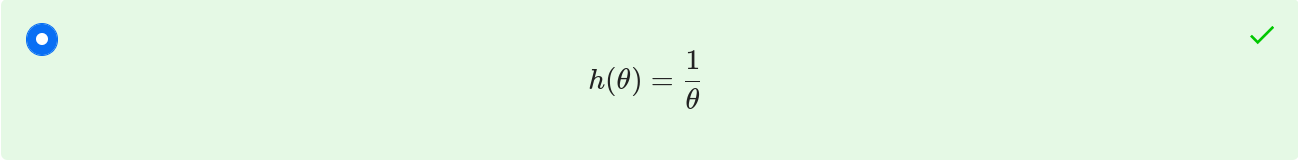

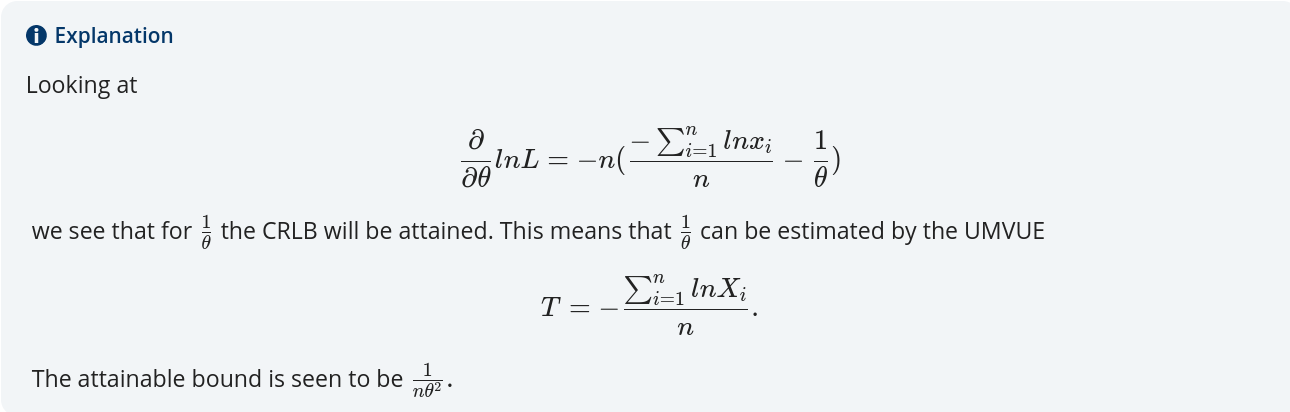

# 5:
let $\mathbf{X} = (X_1, X_2,..., X_n)$ be iid observations from $N(0,\theta)$ population

# 5a:
argue why $ T = \sum_{i=1}^{n}X_i^2$ has the MLR property

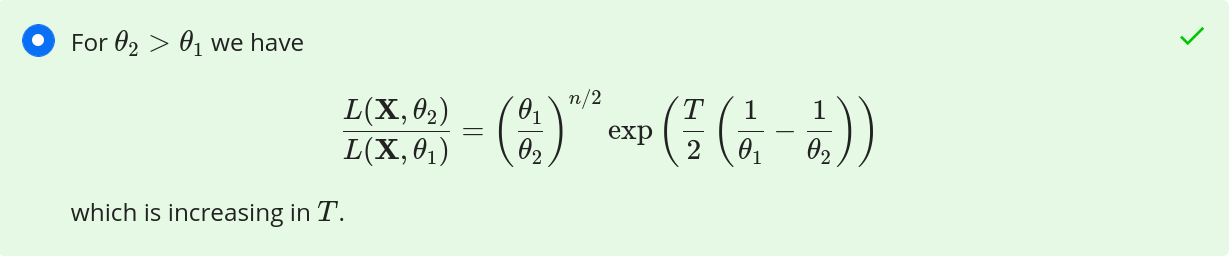

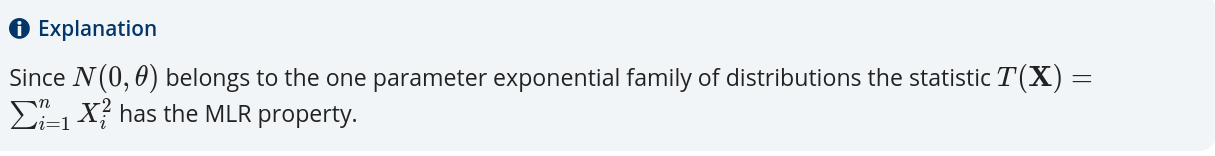

ref week 2 slide 45 - 49

# 5b
consider testing $H_0: \theta \leq \theta_0 \text{ vs } H_1: \theta > \theta_0$. The UMP $\alpha$ test exists due to the teorem of Blackwell and Girshick. Which of the following is the correct structure for the UMP $\alpha$ test?

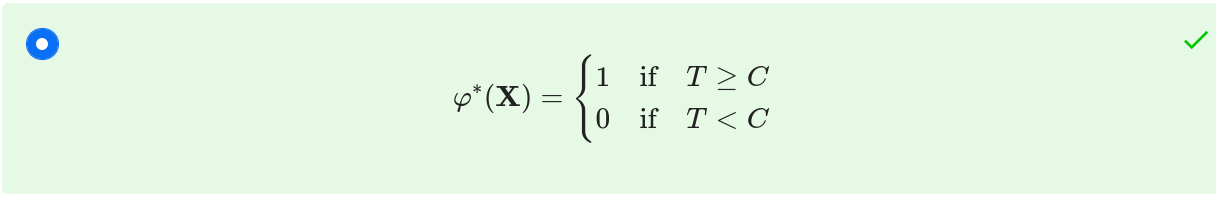

ref week 4 slides 51 - 66

# 5c
find the threshold constant that defines the test in b)

ref week 4 slide 62. identical except uses k instead of C 

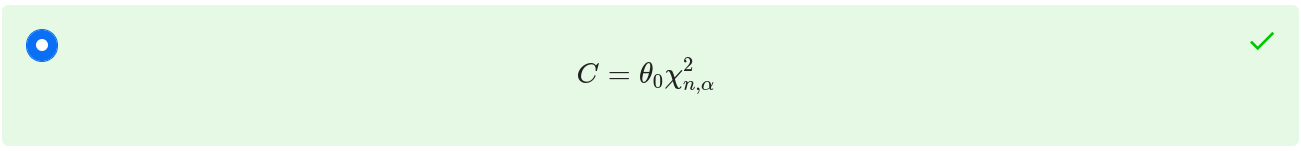

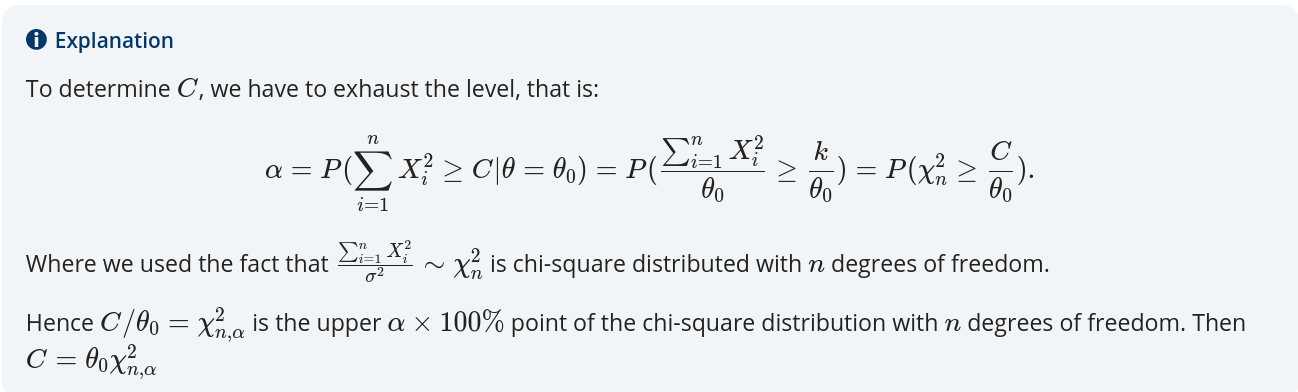

# 5d
for the following test

$$\varphi^*(\mathbf{X}) = 
\begin{cases}
1 & \text{ if } & T \geq k \\
0 & \text{ if } & T < k
\end{cases}
$$

calculate the power function

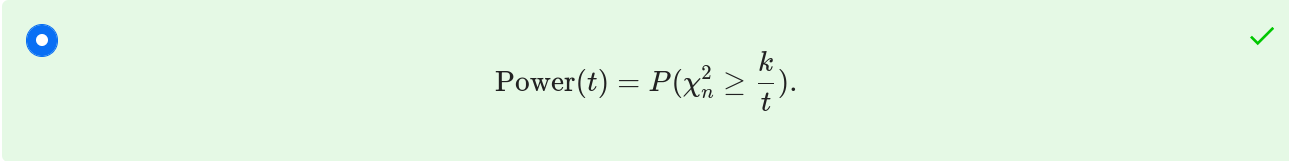

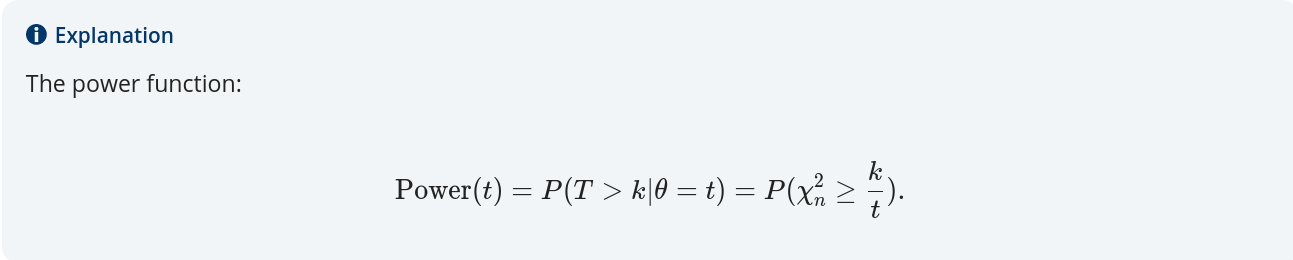

# 5e:
select the most appropriate statement about the power function in d)

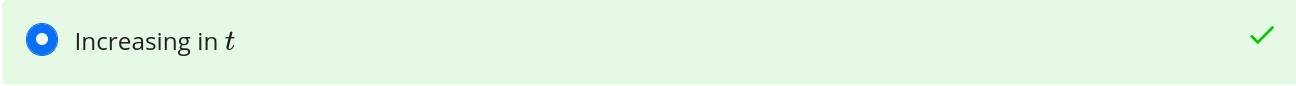